# Model Training for 81 landmark points

In [22]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from math import sin, cos, pi
import tensorflow as tf
from keras.applications import MobileNet
from keras.layers import Conv2D, LeakyReLU, GlobalAveragePooling2D, Dropout, Dense
from keras.models import Sequential


from keras.layers import Activation,Convolution2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout,Conv2D,MaxPool2D,ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

### Load all the Images from a Folder

In [23]:
path_to_data = "crop_demo/"
source_images = []  # append all the images in the folder into a list
for key in os.listdir(os.path.join(path_to_data)):
    source_images.append(os.path.join(path_to_data,key))

### Generalise all images as per Model Input

Function to convert all images into desired model input. Here we will get all images, resize them, convert into numpy array and append it into list.

In [24]:
def generate_images():
    
    images = []
   
    for i in source_images:
        input_image = cv2.imread(i)                   #read image
        input_image = cv2.resize(input_image,(96,96)) #resize into 96*96
        images.append(input_image)                    #append to the list of images
    images = np.array(images)/255.0                   #convert to numpy array
    print('images_shape:',images.shape)
    return images

### Load all the Images by Generalising Model Input

In [25]:
model_input_images = generate_images()                 

images_shape: (1112, 96, 96, 3)


### Load all the Normalised Keypoints from the CSV

Function that Reads CSV which contains normalised landmarks for each image.

In [26]:
file = pd.read_csv('81croplandmarks.csv')
def generate_keypoints(file):
    keypoint_data = file.drop(['Image_name'], axis=1)                  #drop the imagename from csv
    keypoint_features = []  
    for idx, features in keypoint_data.iterrows():  
        keypoint_features.append(features)                             #append all features of each row
    keypoint_features = np.array(keypoint_features, dtype=float)/96.0  #convert all features to np_array & normalise
    print('keypoint_feature:',keypoint_features.shape)
    return keypoint_features                                           


### Load all the Generalised Keypoints

In [27]:
model_input_keypoints = generate_keypoints(file)

keypoint_feature: (1112, 162)


In [28]:
model_input_keypoints[0]

array([0.11434511, 0.34719335, 0.10810811, 0.45322245, 0.11226611,
       0.55925156, 0.12058212, 0.66528067, 0.14553015, 0.76923077,
       0.1975052 , 0.86486486, 0.26611227, 0.94594595, 0.34511435,
       1.01455301, 0.44282744, 1.04158004, 0.55093555, 1.03742204,
       0.65280665, 0.98960499, 0.74636175, 0.92723493, 0.82328482,
       0.84615385, 0.87110187, 0.74844075, 0.8981289 , 0.64241164,
       0.91891892, 0.53638254, 0.93555094, 0.43035343, 0.19126819,
       0.31600832, 0.24740125, 0.28274428, 0.31600832, 0.28066528,
       0.38253638, 0.3014553 , 0.44282744, 0.33264033, 0.58212058,
       0.34511435, 0.65696466, 0.32640333, 0.72972973, 0.32224532,
       0.8004158 , 0.34095634, 0.85031185, 0.38669439, 0.50727651,
       0.40748441, 0.4989605 , 0.48232848, 0.49064449, 0.55717256,
       0.48232848, 0.63409563, 0.3991684 , 0.65072765, 0.43451143,
       0.67151767, 0.47609148, 0.69230769, 0.52182952, 0.68191268,
       0.56340956, 0.67151767, 0.26819127, 0.37837838, 0.31392

In [29]:
model_input_images[0]

array([[[0.16078431, 0.19607843, 0.69411765],
        [0.21568627, 0.26666667, 0.57647059],
        [0.2       , 0.2627451 , 0.56078431],
        ...,
        [0.        , 0.01960784, 0.28235294],
        [0.01568627, 0.03921569, 0.30196078],
        [0.07843137, 0.10588235, 0.37647059]],

       [[0.2       , 0.25490196, 0.55294118],
        [0.24313725, 0.32941176, 0.4       ],
        [0.27058824, 0.3372549 , 0.41960784],
        ...,
        [0.07058824, 0.07843137, 0.11764706],
        [0.09019608, 0.10196078, 0.13333333],
        [0.12156863, 0.14901961, 0.18431373]],

       [[0.20392157, 0.26666667, 0.56470588],
        [0.2627451 , 0.33333333, 0.4       ],
        [0.29019608, 0.32156863, 0.43529412],
        ...,
        [0.06666667, 0.0745098 , 0.11372549],
        [0.08627451, 0.09411765, 0.13333333],
        [0.12941176, 0.16078431, 0.18823529]],

       ...,

       [[0.        , 0.        , 0.25490196],
        [0.03529412, 0.0627451 , 0.0745098 ],
        [0.05882353, 0

# Model Architecture

In [30]:

model = Sequential()

# Input dimensions: (None, 96, 96, 32)
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 96, 96, 32)
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 48, 48, 64)
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 48, 48, 64)
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 24, 24, 96)
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 24, 24, 96)
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 12, 12, 128)
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 12, 12, 128)
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 6, 6, 256)
model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 6, 6, 256)
model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 3, 3, 512)
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 3, 3, 512)
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

# Input dimensions: (None, 3, 3, 512)
model.add(Flatten())
model.add(Dense(512,activation='linear'))
model.add(Dropout(0.1))
model.add(Dense(162))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 32)        864       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)       

#### Saving the Checkpoints for every Epoch

In [10]:
import os
from keras.callbacks import ModelCheckpoint

checkpoint_path = "81pnt_crop_cnn/cp-{epoch:03d}.pkl"
checkpoint_dir = os.path.dirname(checkpoint_path)

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', 
    save_best_only=False)

#### Start Model Training

In [12]:
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# earlyStopping = EarlyStopping(monitor='loss', patience=30, mode='min',
#                              baseline=None)


# rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, min_lr=1e-15, mode='min', verbose=1)

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# history = model.fit(model_input_images, model_input_keypoints, epochs=400, batch_size=32, validation_split=0.15, callbacks=[earlyStopping, rlp,model_checkpoint_callback])

#### Load & Compile the saved Checkpoint 

In [31]:
model.load_weights('81pnt_crop_cnn/cp-210.pkl')

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

## Model Testing on Images

(96, 96, 3)
(1, 96, 96, 3)


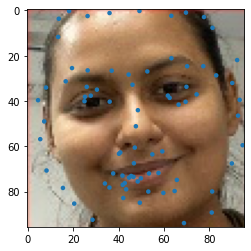

In [33]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle
path = '/home/jhanvipatel/Desktop/PythonTasks/crop_faces/'  
image_test = "test_images/jhanvi.jpg"
test_image = cv2.imread(image_test)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = test_image[y:y + h, x:x + w]
#         cv2.imshow("face",faces)
    cv2.imwrite(os.path.join(path , "crop.jpg"),faces)
    
test_image = cv2.imread("crop.jpg")
test_image = cv2.resize(test_image,(96,96))
cv2.imwrite('final_test_2.jpg',test_image)
images = np.array(test_image)/255.0

print(images.shape)
testt=np.expand_dims(images,axis=0)
print(testt.shape)

ans = model.predict(testt)
# print(abs(ans))

ans = ans * 96
counter = 0
test_x = []
test_y = []
for i in abs(ans[0]):
    if counter%2==0:
        test_x.append(i)
    else:
        test_y.append(i)
    
    counter = counter+1
    
# print("x_cor:",test_x)
# print("y_cor:",test_y)

image_file = 'final_test_2.jpg'
img = plt.imread(image_file)
# rotate_img = rotate(img, 90)


# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# ax.imshow(rotate_img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,yy in zip(test_x,test_y):
    circ = Circle((xx,yy),1)
    ax.add_patch(circ)

# Show the image
plt.show()

(96, 96, 3)
(1, 96, 96, 3)


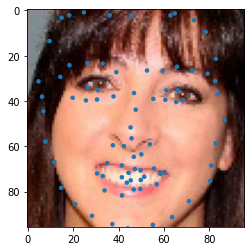

In [34]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle
path = '/home/jhanvipatel/Desktop/PythonTasks/crop_faces/'  
image_test = "test_images/testimage2.jpg"
test_image = cv2.imread(image_test)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = test_image[y:y + h, x:x + w]
#         cv2.imshow("face",faces)
    cv2.imwrite(os.path.join(path , "crop.jpg"),faces)
    
test_image = cv2.imread("crop.jpg")
test_image = cv2.resize(test_image,(96,96))
cv2.imwrite('final_test_2.jpg',test_image)
images = np.array(test_image)/255.0

print(images.shape)
testt=np.expand_dims(images,axis=0)
print(testt.shape)

ans = model.predict(testt)
# print(abs(ans))

ans = ans * 96
counter = 0
test_x = []
test_y = []
for i in abs(ans[0]):
    if counter%2==0:
        test_x.append(i)
    else:
        test_y.append(i)
    
    counter = counter+1
    
# print("x_cor:",test_x)
# print("y_cor:",test_y)

image_file = 'final_test_2.jpg'
img = plt.imread(image_file)
# rotate_img = rotate(img, 90)


# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# ax.imshow(rotate_img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,yy in zip(test_x,test_y):
    circ = Circle((xx,yy),1)
    ax.add_patch(circ)

# Show the image
plt.show()

(96, 96, 3)
(1, 96, 96, 3)


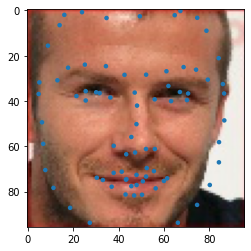

In [35]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle
path = '/home/jhanvipatel/Desktop/PythonTasks/crop_faces/'  
image_test = "test_images/testimage3.jpg"
test_image = cv2.imread(image_test)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = test_image[y:y + h, x:x + w]
#         cv2.imshow("face",faces)
    cv2.imwrite(os.path.join(path , "crop.jpg"),faces)
    
test_image = cv2.imread("crop.jpg")
test_image = cv2.resize(test_image,(96,96))
cv2.imwrite('final_test_2.jpg',test_image)
images = np.array(test_image)/255.0

print(images.shape)
testt=np.expand_dims(images,axis=0)
print(testt.shape)

ans = model.predict(testt)
# print(abs(ans))

ans = ans * 96
counter = 0
test_x = []
test_y = []
for i in abs(ans[0]):
    if counter%2==0:
        test_x.append(i)
    else:
        test_y.append(i)
    
    counter = counter+1
    
# print("x_cor:",test_x)
# print("y_cor:",test_y)

image_file = 'final_test_2.jpg'
img = plt.imread(image_file)
# rotate_img = rotate(img, 90)


# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# ax.imshow(rotate_img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,yy in zip(test_x,test_y):
    circ = Circle((xx,yy),1)
    ax.add_patch(circ)

# Show the image
plt.show()

(96, 96, 3)
(1, 96, 96, 3)


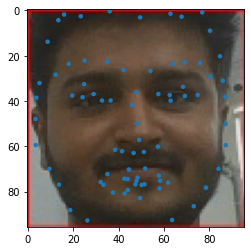

In [36]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle
path = '/home/jhanvipatel/Desktop/PythonTasks/crop_faces/'  
image_test = "test_images/d2.jpg"
test_image = cv2.imread(image_test)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = test_image[y:y + h, x:x + w]
#         cv2.imshow("face",faces)
    cv2.imwrite(os.path.join(path , "crop.jpg"),faces)
    
test_image = cv2.imread("crop.jpg")
test_image = cv2.resize(test_image,(96,96))
cv2.imwrite('final_test_2.jpg',test_image)
images = np.array(test_image)/255.0

print(images.shape)
testt=np.expand_dims(images,axis=0)
print(testt.shape)

ans = model.predict(testt)
# print(abs(ans))

ans = ans * 96
counter = 0
test_x = []
test_y = []
for i in abs(ans[0]):
    if counter%2==0:
        test_x.append(i)
    else:
        test_y.append(i)
    
    counter = counter+1
    
# print("x_cor:",test_x)
# print("y_cor:",test_y)

image_file = 'final_test_2.jpg'
img = plt.imread(image_file)
# rotate_img = rotate(img, 90)


# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# ax.imshow(rotate_img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,yy in zip(test_x,test_y):
    circ = Circle((xx,yy),1)
    ax.add_patch(circ)

# Show the image
plt.show()

(96, 96, 3)
(1, 96, 96, 3)


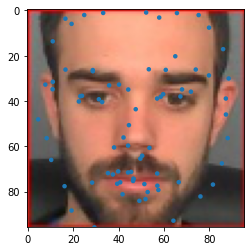

In [37]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle
path = '/home/jhanvipatel/Desktop/PythonTasks/crop_faces/'  
image_test = "test_images/output.jpg"
test_image = cv2.imread(image_test)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = test_image[y:y + h, x:x + w]
#         cv2.imshow("face",faces)
    cv2.imwrite(os.path.join(path , "crop.jpg"),faces)
    
test_image = cv2.imread("crop.jpg")
test_image = cv2.resize(test_image,(96,96))
cv2.imwrite('final_test_2.jpg',test_image)
images = np.array(test_image)/255.0

print(images.shape)
testt=np.expand_dims(images,axis=0)
print(testt.shape)

ans = model.predict(testt)
# print(abs(ans))

ans = ans * 96
counter = 0
test_x = []
test_y = []
for i in abs(ans[0]):
    if counter%2==0:
        test_x.append(i)
    else:
        test_y.append(i)
    
    counter = counter+1
    
# print("x_cor:",test_x)
# print("y_cor:",test_y)

image_file = 'final_test_2.jpg'
img = plt.imread(image_file)
# rotate_img = rotate(img, 90)


# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# ax.imshow(rotate_img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,yy in zip(test_x,test_y):
    circ = Circle((xx,yy),1)
    ax.add_patch(circ)

# Show the image
plt.show()

(96, 96, 3)
(1, 96, 96, 3)


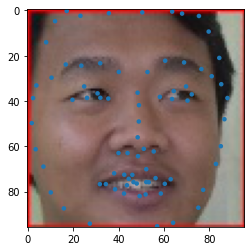

In [38]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle

image_test = "test_images/image1.jpg"
test_image = cv2.imread(image_test)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = test_image[y:y + h, x:x + w]
#         cv2.imshow("face",faces)
    cv2.imwrite(os.path.join(path , "crop.jpg"),faces)
    
test_image = cv2.imread("crop.jpg")
test_image = cv2.resize(test_image,(96,96))
cv2.imwrite('final_test_2.jpg',test_image)
images = np.array(test_image)/255.0

print(images.shape)
testt=np.expand_dims(images,axis=0)
print(testt.shape)

ans = model.predict(testt)
# print(abs(ans))

ans = ans * 96
counter = 0
test_x = []
test_y = []
for i in abs(ans[0]):
    if counter%2==0:
        test_x.append(i)
    else:
        test_y.append(i)
    
    counter = counter+1
    
# print("x_cor:",test_x)
# print("y_cor:",test_y)

image_file = 'final_test_2.jpg'
img = plt.imread(image_file)
# rotate_img = rotate(img, 90)


# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# ax.imshow(rotate_img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,yy in zip(test_x,test_y):
    circ = Circle((xx,yy),1)
    ax.add_patch(circ)

# Show the image
plt.show()

## Model Testing on Video 

In [40]:
import cv2
import time
  
vid = cv2.VideoCapture('jhanvi.mp4')
width  = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)) 
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('width, height:', width, height)  

while(True):
    
    ret, frame = vid.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around the faces and crop the faces
    for (x, y, w, h) in faces:
        rect_h = h
        rect_w = w
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        faces = frame[y:y + h, x:x + w]
        cv2.imwrite(os.path.join(path ,"crop.jpg"),faces)

    test_image = cv2.imread("crop.jpg")
    test_image = cv2.resize(frame,(96,96))
    display_image = cv2.resize(frame,(height,width))
    images = np.array(test_image)/255.0
    testt=np.expand_dims(images,axis=0)

    ans = model.predict(testt)
    
    display_ans = (ans)

    counter = 0
    test_x = []
    test_y = []
    for i in abs(display_ans[0]):
        if counter%2==0:
            test_x.append(i * rect_w)
        else:
            test_y.append(i * rect_h)

        counter = counter+1

    intx = [int(item) for item in test_x]

    inty = [int(items) for items in test_y]

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)    
    for (x, y, w, h) in faces:
        faces = frame[y:y + h, x:x + w]
        for (p,q) in zip(intx, inty):
            cv2.circle(faces, (p,q), 2, (0, 0, 0), -1)   
            
    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()


cv2.destroyAllWindows()

width, height: 720 1280
